# **BOSTON HOUSE PRICE PREDICTION**

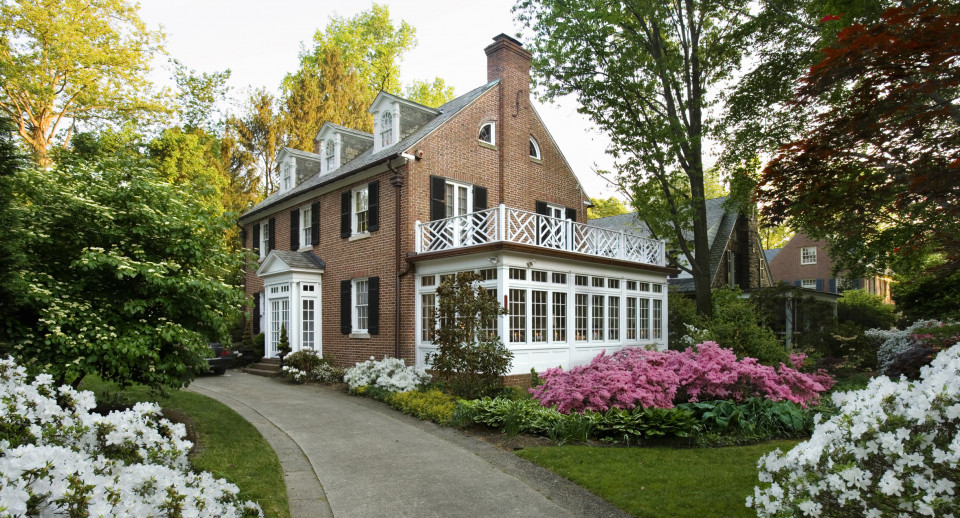

## **Attribute Information:**
**Continuous Attributes - 13 and Binary Attribute - 1**

- CRIM :- How much crime there is in the area. Higher numbers mean more crime.

- ZN :- The percentage of land in the town that is set aside for large residential properties (lots bigger than 25,000 square feet). It indicates how much of the residential land in a town is designated for larger homes.

- INDUS :- The percentage of land in the town used for non-retail businesses (like factories, warehouses, etc.).

- CHA :-  Whether the area is next to the Charles River (1 if it is, 0 if it isn't).

- NOX :- The concentration of nitrogen oxides in the air, which is a measure of pollution. It’s given in parts per 10 million.

- RM :- The average number of rooms in each house.

- AGE :- The percentage of homes in the area that were built before 1940.

- DIS :- The average distance from the area to five major employment centers in Boston. Higher numbers mean farther away.

- RAD :- A measure of how accessible the area is to major roads and highways. Higher numbers mean better access.

- TAX :- The rate of property taxes in the area, expressed per $10,000 of property value.

- PTRATIO :- The ratio of students to teachers in local schools. Higher numbers mean larger class sizes.

- B :- A measure related to the racial composition of the area. It’s calculated using the percentage of Black residents, but it's a bit complex and not directly interpretable on its own. B is a measure derived to capture the racial composition of the area, specifically related to the percentage of Black residents.

- LSTAT :- The percentage of people in the area with lower socioeconomic status. Higher numbers mean a higher percentage of people with lower income and education.

- MEDV :- The median value of homes in the area, given in thousands of dollars. This is the target variable you're trying to predict.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import StratifiedShuffleSplit

## Importing Dataset

In [3]:
housing = pd.read_csv('data.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Handeling Missing Values

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     504 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    505 non-null    float64
 3   CHAS     504 non-null    float64
 4   NOX      503 non-null    float64
 5   RM       500 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      502 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  505 non-null    float64
 11  B        505 non-null    float64
 12  LSTAT    504 non-null    float64
 13  MEDV     503 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [22]:
housing['CHAS'].mode()[0]

0.0

In [23]:
missing_value_fill = {
    'CRIM': housing['CRIM'].mean(),
    'INDUS': housing['INDUS'].mean(),
    'CHAS': housing['CHAS'].mode()[0],
    'NOX': housing['NOX'].mean(),
    'RM': housing['RM'].mean(),
    'DIS': housing['DIS'].mean(),
    'PTRATIO': housing['PTRATIO'].mean(),
    'B': housing['B'].mean(),
    'LSTAT': housing['LSTAT'].mean(),
    'LSTAT': housing['LSTAT'].mean()
}

housing.fillna(value = missing_value_fill, inplace=True)
housing.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       3
dtype: int64

In [32]:
housing = housing[housing['MEDV'].notnull()]

## Data Visualization

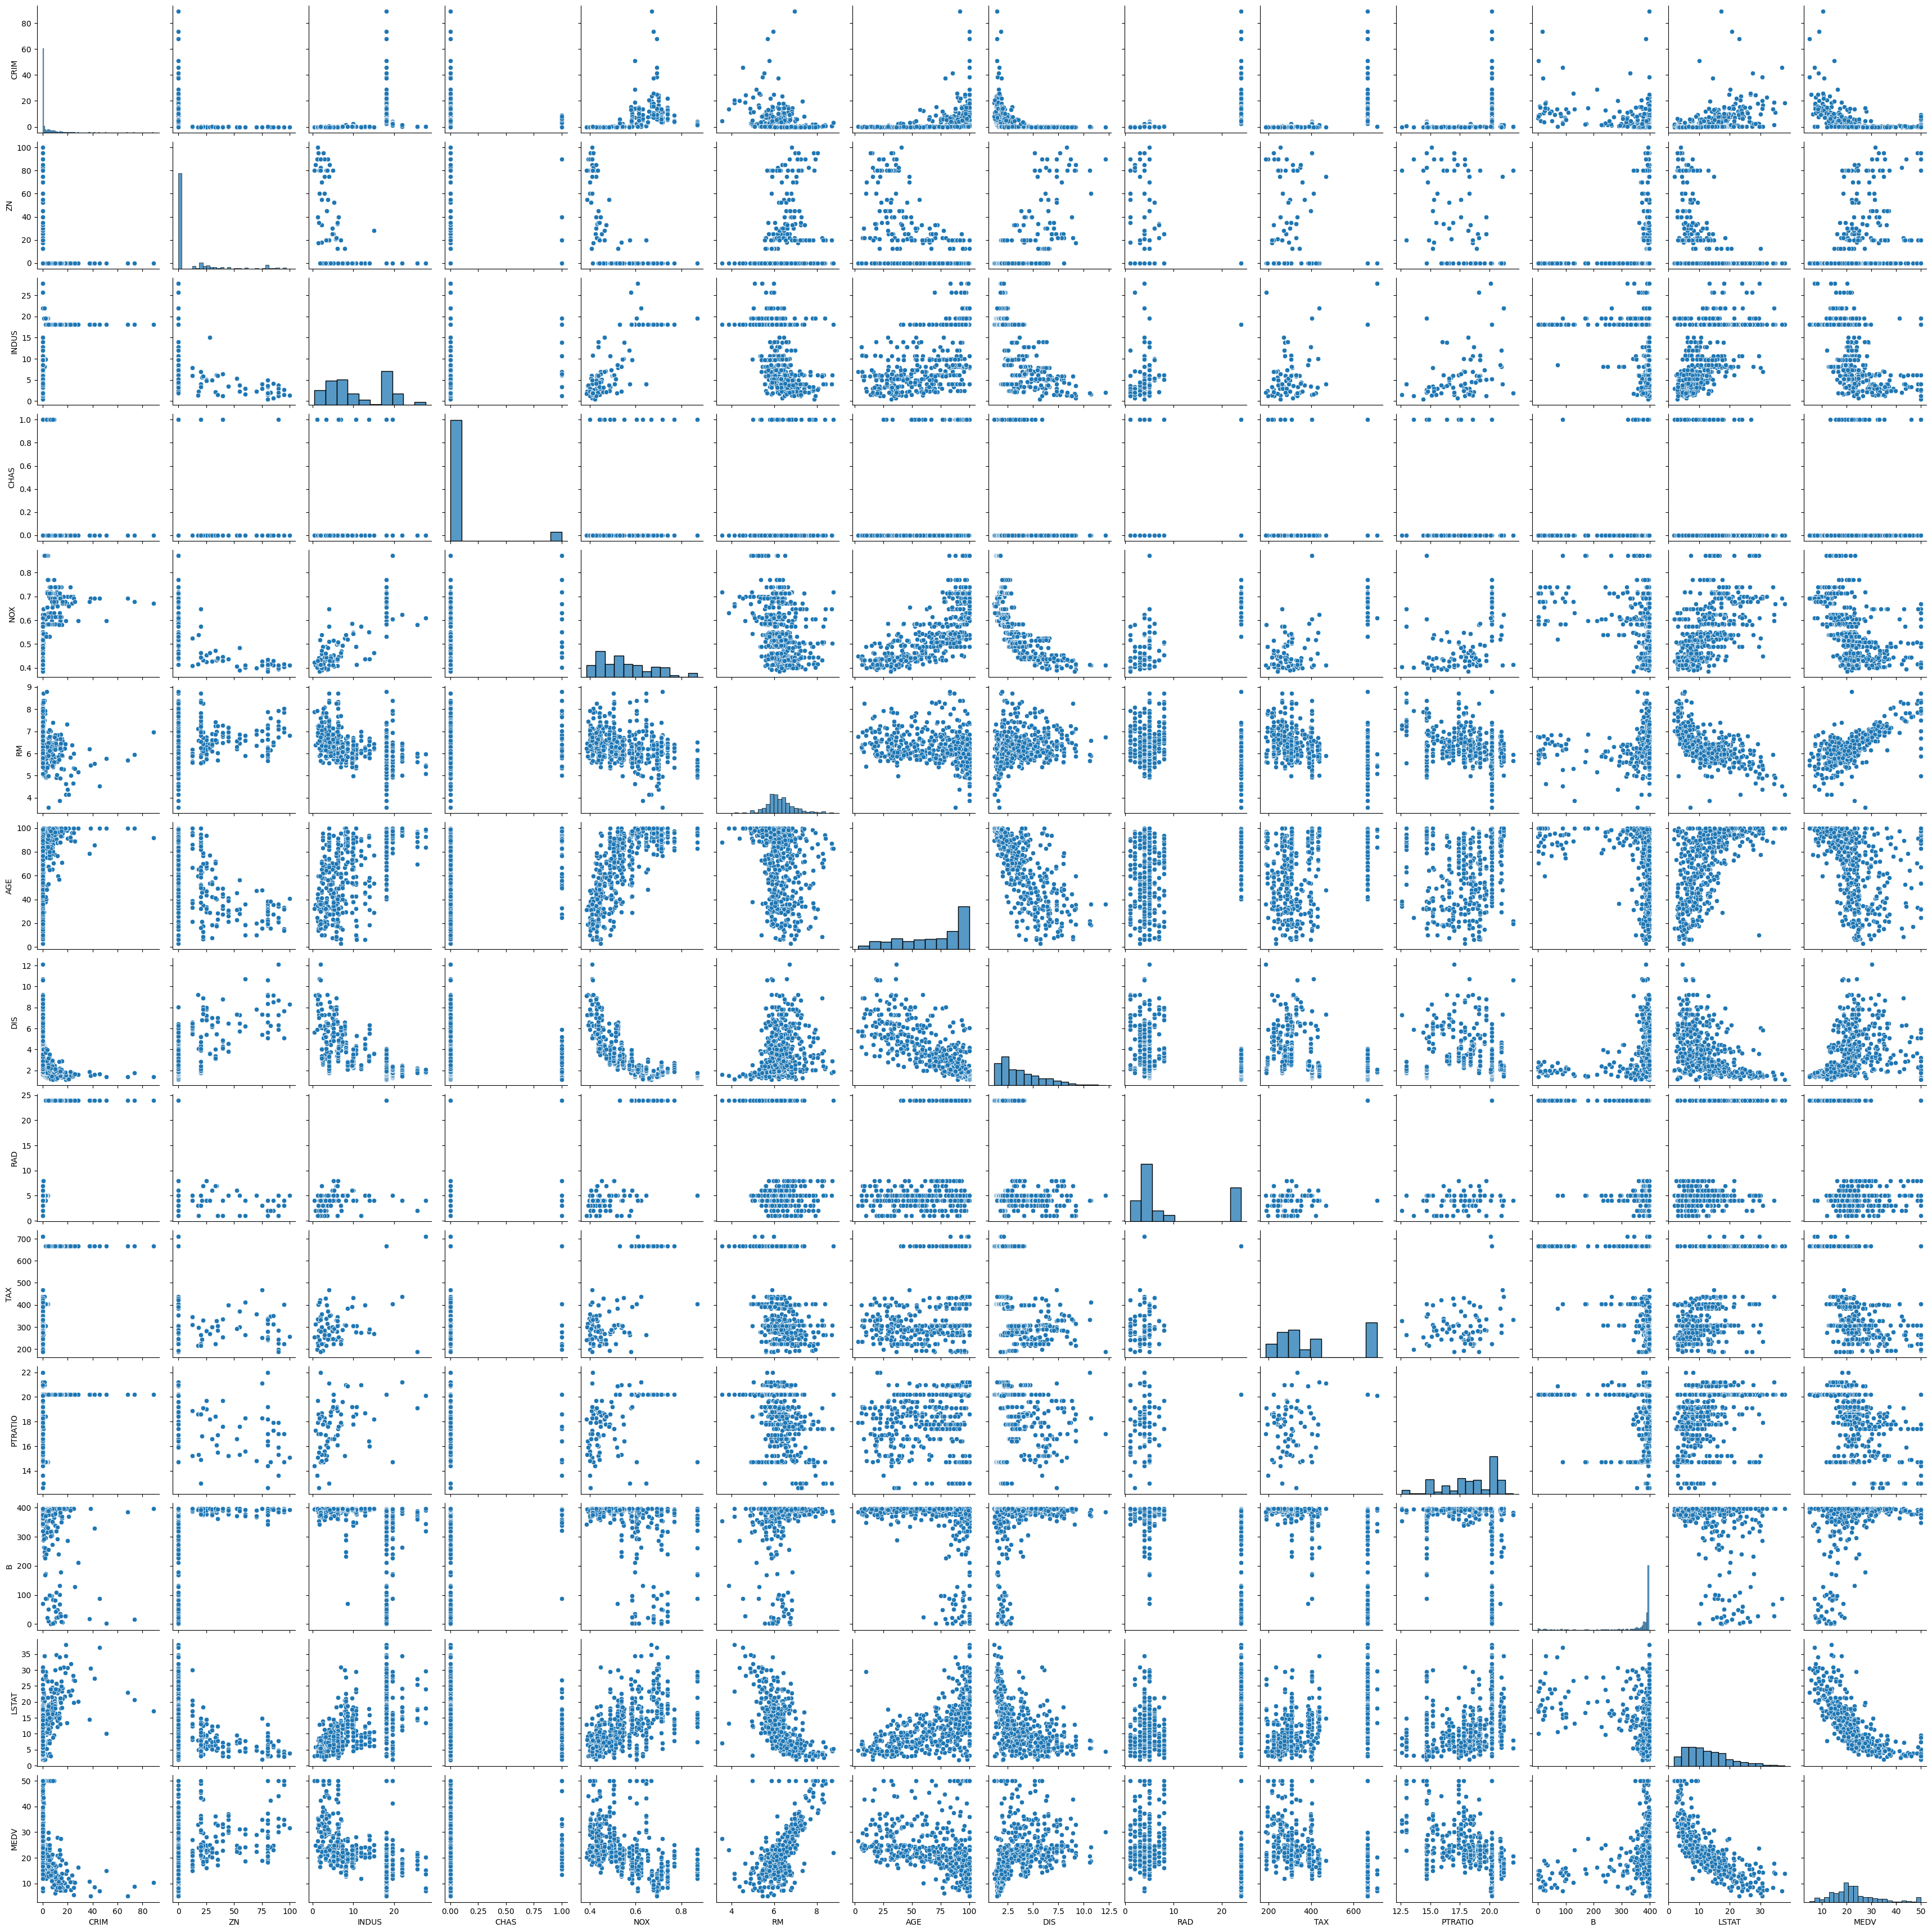

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


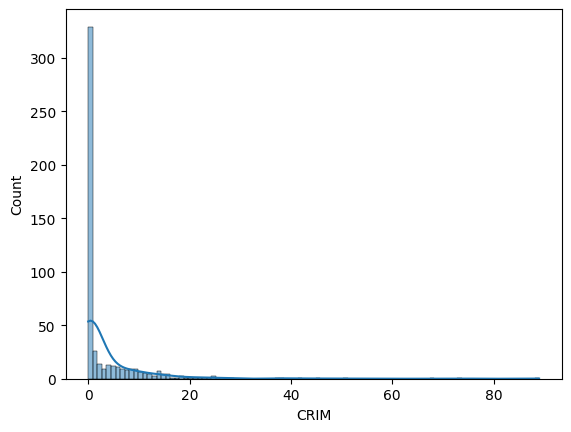

In [10]:
sns.histplot(x = df['CRIM'], kde = True, )
plt.show()